<a href="https://colab.research.google.com/github/eylons1/open-data/blob/master/%D7%9E%D7%95%D7%93%D7%9C%D7%99%D7%9D_%D7%97%D7%99%D7%A9%D7%95%D7%91%D7%99%D7%99%D7%9D_%D7%A9%D7%9C_%D7%9C%D7%9E%D7%99%D7%93%D7%94_%D7%AA%D7%A8%D7%92%D7%99%D7%9C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"peaks" function into Python

In [ ]:
import numpy as np

def peaks(x, y):
    z = (3 * (1 - x)**2 * np.exp(-(x**2) - (y + 1)**2)
         - 10 * (x / 5 - x**3 - y**5) * np.exp(-x**2 - y**2)
         - 1/3 * np.exp(-(x + 1)**2 - y**2))
    return z / 10  # Divided by 10 as per your specification



Build the Neural Network

In [ ]:
import torch
import torch.nn as nn

class ThreeLayerNet(nn.Module):
    def __init__(self):
        super(ThreeLayerNet, self).__init__()
        self.fc1 = nn.Linear(3, 100)  # 3 inputs to account for x, y, and a bias neuron
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 1)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        return self.fc3(x)


Generate Training Data

In [ ]:
def generate_data(num_points):
    x = np.random.uniform(-3, 3, (num_points, 2))
    y = peaks(x[:, 0], x[:, 1])
    return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32).view(-1, 1)


Train the Network

Epoch 0, Validation Loss: 1.0666899681091309
Epoch 1000, Validation Loss: 1.0831995010375977
Epoch 2000, Validation Loss: 1.065838098526001
Epoch 3000, Validation Loss: 1.0708526372909546
Epoch 4000, Validation Loss: 1.0704442262649536
Epoch 5000, Validation Loss: 1.0847065448760986
Epoch 6000, Validation Loss: 1.0851144790649414
Epoch 7000, Validation Loss: 1.0726566314697266
Epoch 8000, Validation Loss: 1.071242332458496
Epoch 9000, Validation Loss: 1.0748790502548218


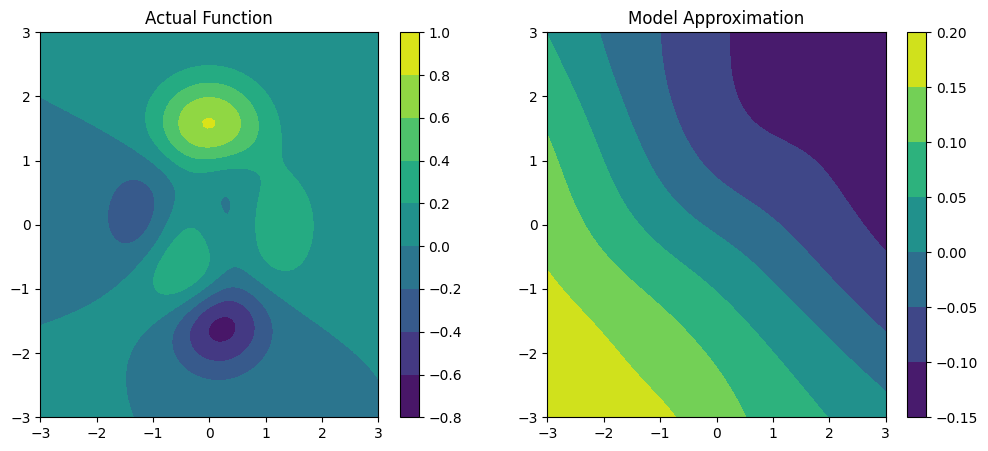

In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt

model = ThreeLayerNet()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Prepare validation data
validation_x, validation_y = generate_data(1000)

# Training and evaluation
losses = []
for epoch in range(10000):  # Adjust number of epochs as necessary
    inputs, targets = generate_data(1)
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        with torch.no_grad():
            val_outputs = model(validation_x)
            val_loss = criterion(val_outputs, validation_y)
            losses.append(val_loss.item())
            print(f'Epoch {epoch}, Validation Loss: {val_loss.item()}')

# Visualization
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = peaks(X, Y)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
cp = ax[0].contourf(X, Y, Z)
fig.colorbar(cp, ax=ax[0])
ax[0].set_title('Actual Function')

# Generate predictions for mesh grid
mesh_inputs = torch.tensor(np.stack([X.ravel(), Y.ravel()], axis=1), dtype=torch.float32)
mesh_outputs = model(mesh_inputs).detach().numpy().reshape(X.shape)

cp = ax[1].contourf(X, Y, mesh_outputs)
fig.colorbar(cp, ax=ax[1])
ax[1].set_title('Model Approximation')
plt.show()


Code Explanation
Import Libraries

import numpy as np: Imports the NumPy library, which is used for numerical operations.
import torch: Imports the PyTorch library, essential for building and training neural networks.
import torch.nn as nn: Imports PyTorch's neural network module.
import torch.optim as optim: Imports PyTorch's optimization module, which includes various optimization algorithms like SGD.
Defining the peaks function

This function mimics MATLAB's peaks function. It's a mathematical function used here to generate target values for training based on inputs x and y.
Neural Network Definition

class ThreeLayerNet(nn.Module): Defines a new class for our neural network model, inheriting from PyTorch's nn.Module.
__init__: Constructor to initialize the neural network layers.
self.fc1 = nn.Linear(2, 100): First linear layer with 2 inputs and 100 outputs.
self.fc2 = nn.Linear(100, 100): Second linear layer with 100 inputs and 100 outputs (fully connected).
self.fc3 = nn.Linear(100, 1): Third linear layer that outputs a single value from 100 inputs.
forward: Defines the forward pass of the network.
Applies the tanh activation function to the outputs of the first and second layers and passes the result through the third layer.
Data Generation Function

def generate_data(num_points): Generates training data.
x = np.random.uniform(-3, 3, (num_points, 2)): Generates num_points samples of x and y values uniformly distributed between -3 and 3.
y = peaks(x[:, 0], x[:, 1]): Computes the peaks function for the generated x and y.
The function returns the inputs and targets converted to PyTorch tensors.
Setup for Training

model = ThreeLayerNet(): Instantiates the neural network.
criterion = nn.MSELoss(): Sets the mean squared error loss function for evaluating how well the network performs.
optimizer = optim.SGD(model.parameters(), lr=0.001): Defines the optimizer, stochastic gradient descent, with a learning rate of 0.001.
Training Loop

Loops through 1000 epochs (iterations):
inputs, targets = generate_data(1): Generates one sample of data.
optimizer.zero_grad(): Clears old gradients; necessary because gradients accumulate by default.
outputs = model(inputs): Passes the input through the network to get the output.
loss = criterion(outputs, targets): Computes the loss between the network output and the target values.
loss.backward(): Backpropagation step to compute the gradient of the loss function with respect to network weights.
optimizer.step(): Updates the weights based on the gradients.
Prints the loss every 1000 steps.
This setup builds a basic three-layer neural network that learns to approximate the peaks function based on the input-output mapping defined by generate_data. It involves typical neural network components such as layers, activation functions, loss computation, backpropagation, and weight updates.